In [4]:
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
list_sf = ['human.blast', 'mouse.blast', 'zebrafish.blast', 'drosophila.blast', 'c.elegans.blast', 'yeast.blast', 'ciliate.blast', 'methanocaldococcus.blast', 'thermococcus.blast', 'tuberculosis.blast', 'e.coli.blast']

In [6]:
e_values = {}
for i in list_sf:
    path = './blasts/' + i
    with open(path, encoding  = 'utf-8') as f:
        text = f.readlines()
    for j in text:
        value = 0
        if j.startswith('NP_001387099.1'):
            value = float(j.split('\t')[-2])
            if value < 1.0e-300:
                value = 1.0e-300
            name = re.sub(r'\.blast', '', i)
            e_values[name] = value
            break
print(e_values)

{'human': 1e-300, 'mouse': 1e-300, 'zebrafish': 1e-300, 'drosophila': 1e-300, 'c.elegans': 3.89e-124, 'yeast': 6.35e-48, 'ciliate': 2.43e-18, 'methanocaldococcus': 3.15e-08, 'thermococcus': 0.004, 'tuberculosis': 0.35, 'e.coli': 0.000759}


In [7]:
import pandas as pd

df  = pd.DataFrame.from_dict(e_values, orient = 'index').T
df

,human,mouse,zebrafish,drosophila,c.elegans,yeast,ciliate,methanocaldococcus,thermococcus,tuberculosis,e.coli
0,1.000000e-300,1.000000e-300,1.000000e-300,1.000000e-300,3.890000e-124,6.350000e-48,2.430000e-18,3.150000e-08,0.004,0.35,0.000759


In [18]:
for i in os.listdir('histones'):
    with open(f'histones/{i}') as f:
        text = f.readlines()
    with open(i, 'w') as f1:
        f1.write(''.join(text[0:3]))

In [8]:
histones = ['H2A', 'H2B', 'H3', 'H4']
values = {}
for i in range(len(histones)):
    #print(histones[i])
    for j in list_sf:
        path = f'hist_blast/{histones[i]}/{j}'
        with open(path, encoding  = 'utf-8') as f:
            text = f.readlines()
        for f in text:
            value = 0
            if f.startswith('NP'):
                #print(j)
                value = float(f.split('\t')[-2])
                if value < 1.0e-300:
                    value = 1.0e-300
                name = re.sub(r'\.blast', '', j)
                values[name] = value
                #print(name)
                break
    df.loc[len(df.index)] = values.values()

In [9]:
print(e_values)

{'human': 1e-300, 'mouse': 1e-300, 'zebrafish': 1e-300, 'drosophila': 1e-300, 'c.elegans': 3.89e-124, 'yeast': 6.35e-48, 'ciliate': 2.43e-18, 'methanocaldococcus': 3.15e-08, 'thermococcus': 0.004, 'tuberculosis': 0.35, 'e.coli': 0.000759}


In [10]:
df['file'] = ['UTY', 'H2A', 'H2B', 'H3', 'H4']
df = df.set_index('file')

In [72]:
df.to_csv('no_log.csv')

In [11]:
df.applymap(lambda x: -np.log(x)).to_csv('log.csv')
df = df.applymap(lambda x: -np.log(x))
df

,human,mouse,zebrafish,drosophila,c.elegans,yeast,ciliate,methanocaldococcus,thermococcus,tuberculosis,e.coli
file,,,,,,,,,,,
UTY,690.775528,690.775528,690.775528,690.775528,284.162142,108.675630,40.558640,17.273278,5.521461,1.049822,7.183509
H2A,207.937878,191.897635,186.451124,158.028220,152.396794,142.879059,130.351262,6.907755,1.897120,0.916291,-0.182322
H2B,199.277584,190.974801,162.868356,134.658598,148.004105,130.125673,112.179566,-0.955511,1.771957,-0.788457,-0.587787
H3,220.264267,220.616387,218.174604,218.808524,214.947850,199.127955,195.892897,3.381395,2.864704,-1.526056,0.105361
H4,154.187024,154.547638,156.453569,154.493848,154.759334,119.657464,102.943385,9.406355,10.315977,2.673649,-0.262364


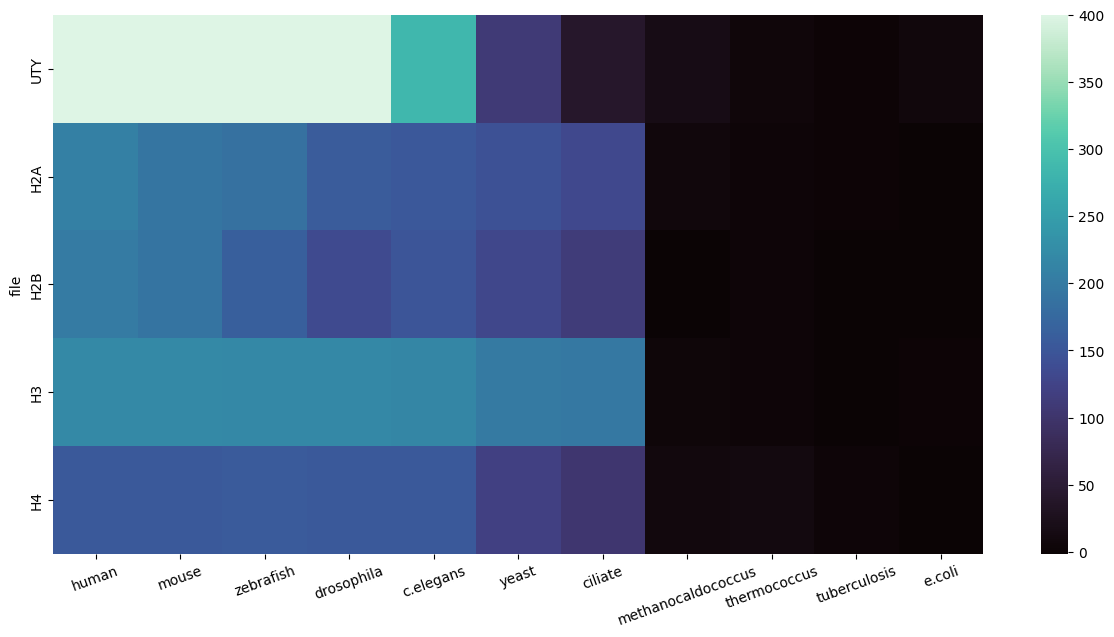

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(df, vmax=400, cmap='mako')
plt.xticks(rotation=20)

plt.savefig('heatmap.png')
plt.show()
